In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [107]:
# !unzip /content/gdrive/MyDrive/gdriveupmebot/archive.zip

# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [81]:
train="/content/Vegetable Images/train"
test="/content/Vegetable Images/test"
val="/content/Vegetable Images/validation"

An example of pictures

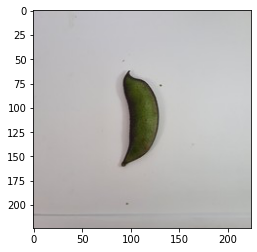

In [ ]:
plt.imshow(imread("/content/Vegetable Images/train/Bean/0026.jpg"))

In [49]:
shape=imread("/content/Vegetable Images/train/Brinjal/0001.jpg").shape

Importing images as data and scaling them

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
idg=ImageDataGenerator(rescale=1/255)

In [82]:
train=idg.flow_from_directory(train,target_size=(224,224))
test=idg.flow_from_directory(test,shuffle=False,target_size=(224,224))
val=idg.flow_from_directory(val,shuffle=False,target_size=(224,224))

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [31]:
train.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

# Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
es=EarlyStopping(patience=1)

In [83]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=shape,padding="valid"))
model.add(MaxPool2D(pool_size=(2,2),padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="valid"))
model.add(MaxPool2D(pool_size=(2,2),padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="valid"))
model.add(MaxPool2D(pool_size=(2,2),padding="valid"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dense(15,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [84]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 64)     

In [57]:
train

In [85]:
model.fit(train,validation_data=val,callbacks=[es],epochs=25)

Epoch 1/25
469/469 [==============================] - 64s 130ms/step - loss: 1.0700 - accuracy: 0.6611 - val_loss: 0.5801 - val_accuracy: 0.8057
Epoch 2/25
469/469 [==============================] - 60s 127ms/step - loss: 0.2788 - accuracy: 0.9123 - val_loss: 0.3920 - val_accuracy: 0.8763
Epoch 3/25
469/469 [==============================] - 59s 127ms/step - loss: 0.1132 - accuracy: 0.9655 - val_loss: 0.2458 - val_accuracy: 0.9280
Epoch 4/25
469/469 [==============================] - 59s 127ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.2196 - val_accuracy: 0.9427
Epoch 5/25
469/469 [==============================] - 59s 126ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.2885 - val_accuracy: 0.9337
Epoch 6/25
469/469 [==============================] - 59s 126ms/step - loss: 0.0562 - accuracy: 0.9836 - val_loss: 0.2861 - val_accuracy: 0.9407


**Evaluations**

In [90]:
import pandas as pd
hist=pd.DataFrame(model.history.history)

In [91]:
hist

,loss,accuracy,val_loss,val_accuracy
0,1.069952,0.661067,0.580097,0.805667
1,0.278799,0.912267,0.392038,0.876333
2,0.113221,0.965467,0.245757,0.928000
3,0.071369,0.977400,0.219555,0.942667
4,0.057298,0.981933,0.288522,0.933667
5,0.056207,0.983600,0.286088,0.940667


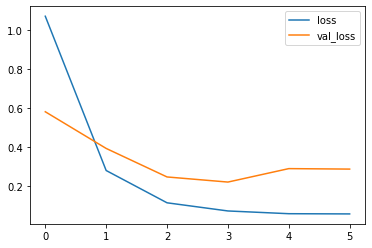

In [92]:
hist[["loss","val_loss"]].plot()

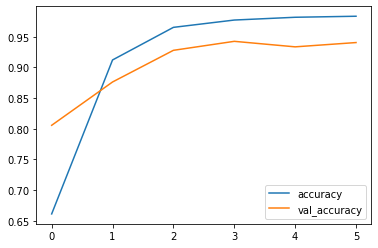

In [93]:
hist[["accuracy","val_accuracy"]].plot()

In [94]:
prediction=np.argmax(model.predict(test), axis=-1)

In [96]:
from sklearn import metrics

In [101]:
print(metrics.classification_report(prediction,test.classes))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       180
           1       0.91      0.97      0.94       187
           2       0.98      0.99      0.99       197
           3       0.93      0.94      0.93       197
           4       0.95      0.94      0.95       203
           5       0.91      0.93      0.92       194
           6       0.98      0.97      0.98       203
           7       0.99      0.97      0.98       205
           8       0.94      0.82      0.87       228
           9       0.97      0.95      0.96       206
          10       0.97      0.96      0.97       204
          11       0.98      0.93      0.96       210
          12       0.92      0.91      0.91       201
          13       0.98      0.96      0.97       206
          14       0.86      0.97      0.91       179

    accuracy                           0.94      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.95   

In [105]:
print(metrics.confusion_matrix(prediction,test.classes))

[[176   0   1   0   0   0   0   0   0   0   0   0   0   0   3]
 [  3 182   0   0   0   0   0   0   0   0   0   0   0   1   1]
 [  0   0 196   1   0   0   0   0   0   0   0   0   0   0   0]
 [  4   2   0 185   0   0   1   0   0   4   0   0   0   0   1]
 [  3   0   0   2 191   1   0   0   3   0   0   0   1   1   1]
 [  1   2   0   1   2 181   0   0   1   0   0   0   2   0   4]
 [  1   0   0   2   0   0 197   0   0   0   1   0   2   0   0]
 [  0   0   0   0   0   0   1 199   0   0   0   1   0   0   4]
 [  7  10   0   1   3   8   1   0 187   0   0   0   3   1   7]
 [  1   0   1   2   0   2   0   0   1 195   4   0   0   0   0]
 [  0   0   2   6   0   0   0   0   0   1 195   0   0   0   0]
 [  1   0   0   0   0   2   0   1   2   0   0 196   7   0   1]
 [  2   3   0   0   4   3   0   0   3   0   0   0 183   0   3]
 [  0   0   0   0   0   1   0   0   3   0   0   3   0 197   2]
 [  1   1   0   0   0   2   0   0   0   0   0   0   2   0 173]]
